In [208]:
%reset -f
import pandas as pd
import numpy as np
from wavhandler import *
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

ERROR:root:Invalid alias: The name clear can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name more can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name less can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name man can't be aliased because it is another magic command.


In [209]:
data = Dataset('Wingbeats')
data.read(data=30000, setting='psd_dB', labels='text') # data.target_classes[1]

Data: 30000.
Read 30000 filenames in 0.80 seconds.
Loaded data into matrix in 10.11 seconds.


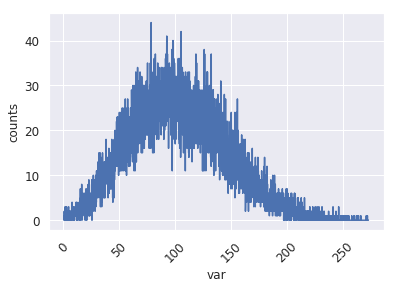

In [211]:
data.clean(threshold=20)

### Trying PCA

Explained Variance with 3 components: 0.55


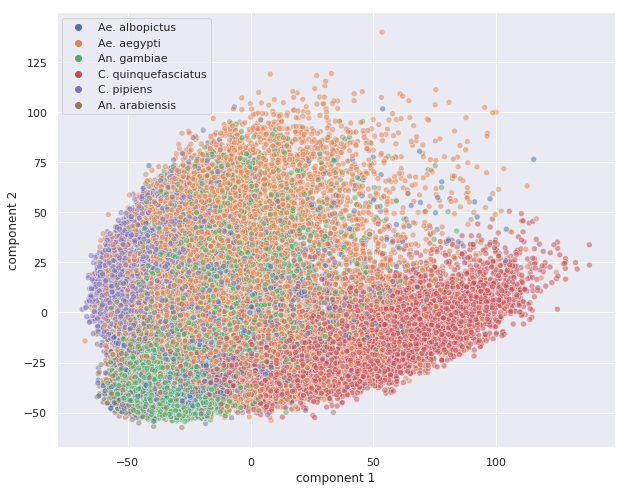

In [212]:
perform_analysis(data.X, data.y)

### Trying Kernel PCA 

In [213]:
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

X_std = StandardScaler(with_std=False).fit_transform(data.X)  # standardization of data

rbf_pca = KernelPCA(n_components=2, kernel="sigmoid")#, gamma=0.4)

X_final = rbf_pca.fit_transform(X_std)

plt.figure(figsize=(10,8))
sns.scatterplot(X_final[:,0], X_final[:,1],alpha=0.5, legend='full', hue=data.y) 
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.show()

MemoryError: 

### Trying LLE (Locally Linear Embedding)

In [214]:
from sklearn.manifold import LocallyLinearEmbedding

In [215]:
X_std = StandardScaler(with_std=False).fit_transform(data.X)  # standardization of data

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=5)
X_final = lle.fit_transform(X_std)


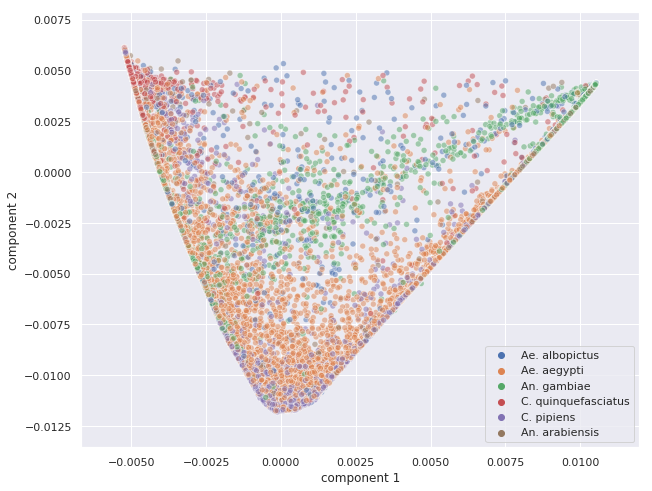

In [216]:
plt.figure(figsize=(10,8))
sns.scatterplot(X_final[:,0], X_final[:,1],alpha=0.5, legend='full', hue=data.y) 
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.show()

### Trying t-SNE

In [217]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [220]:
n_components = 2
learning_rate = 300
perplexity = 50
early_exaggeration = 12
init='random'
random_state = 2018

tSNE = TSNE(n_components=n_components, learning_rate=learning_rate, \
           perplexity=perplexity, early_exaggeration=early_exaggeration, \
           init=init, random_state=random_state)

In [221]:
X_std = StandardScaler(with_std=True).fit_transform(data.X)  # standardization of data

X_final = tSNE.fit_transform(X_std)

In [222]:
plt.figure(figsize=(20,12))
sns.scatterplot(X_final[:,0], X_final[:,1],alpha=0.9, legend='full', hue=big.y, palette=sns.color_palette("cubehelix", 5)) 
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.show()

NameError: name 'big' is not defined

<Figure size 1440x864 with 0 Axes>

# **Using more fly data**

In [117]:
data1 = Dataset('Leafminers')
data1.read(data=data1.target_classes[0], setting='psd_dB', labels='text')

data2 = Dataset('Leafminers')
data2.read(data=data2.target_classes[1], setting='psd_dB', labels='text')
data2.y = data2.y.apply(lambda x: x+'_')

data3 = Dataset('Thomas')
data3.read(data=data3.target_classes[1], setting='psd_dB', labels='text')

data4 = Dataset('LG')
data4.read(data=data4.target_classes[1], setting='psd_dB', labels='text')

data5 = Dataset('Thomas')
data5.read(data=data5.target_classes[0], setting='psd_dB', labels='text')

Data: Cichorii.
Read 1451 filenames in 0.05 seconds.
Loaded data into matrix in 0.55 seconds.
Data: Cichorii_v2.
Read 4104 filenames in 0.04 seconds.
Loaded data into matrix in 1.26 seconds.
Data: Suzukii.
Read 13619 filenames in 0.13 seconds.
Loaded data into matrix in 4.02 seconds.
Data: LG_zapr_26_09.
Read 7210 filenames in 0.09 seconds.
Loaded data into matrix in 2.36 seconds.
Data: Melanogaster.
Read 6811 filenames in 0.14 seconds.
Loaded data into matrix in 1.83 seconds.


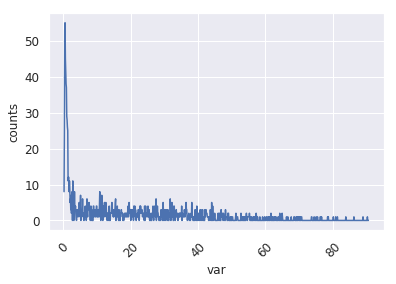

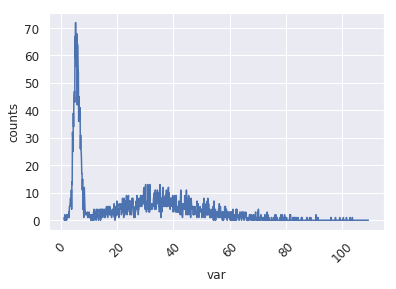

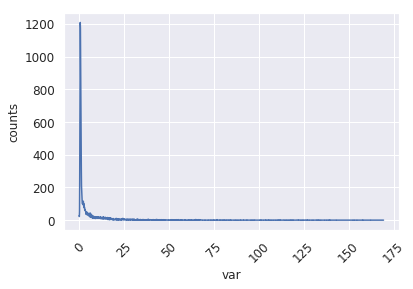

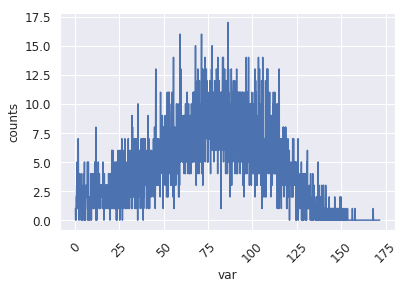

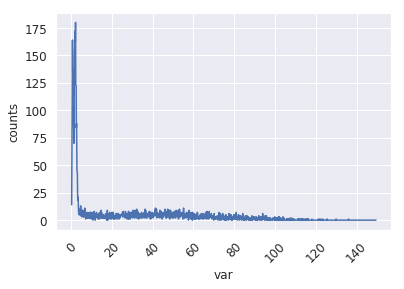

In [118]:
data1.clean(threshold=20)
data2.clean(threshold=20)
data3.clean(threshold=20)
data4.clean(threshold=20)
data5.clean(threshold=20)

In [196]:
big = pd.DataFrame()

big = pd.concat([data1.X, data2.X, data3.X, data4.X, data5.X], axis=0)
big['y'] = pd.concat([data1.y, data2.y, data3.y, data4.y, data5.y], axis=0)
big.dropna(how='any', axis=1, inplace=True)
big.shape

(13212, 130)

In [197]:
big = big[big.y != 'Cichorii']

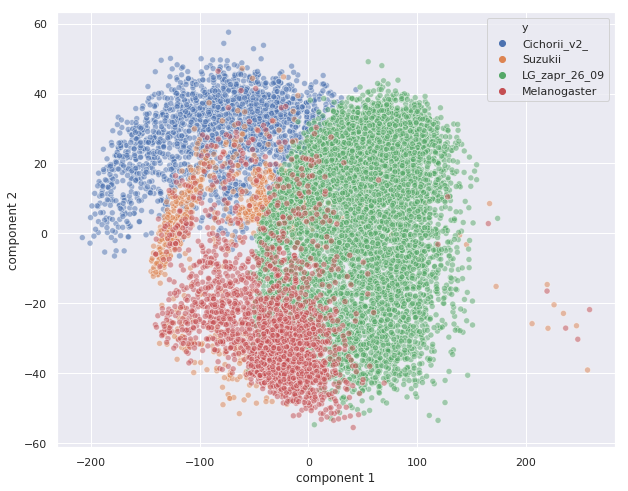

In [185]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

X_std = StandardScaler(with_std=False).fit_transform(big.iloc[:,:-1])  # standardization of data

pca = PCA(n_components=2)#, gamma=0.4)

X_pca = pca.fit_transform(X_std)

plt.figure(figsize=(10,8))
sns.scatterplot(X_pca[:,0], X_pca[:,1],alpha=0.5, legend='full', hue=big.y) 
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.show()

### Trying t-SNE

In [198]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [199]:
tSNE = TSNE(n_components=2, 
            learning_rate=100, 
            perplexity=10, 
            early_exaggeration=6, 
            init=init, 
            random_state=random_state)

In [200]:
# X_std = StandardScaler(with_std=True).fit_transform(big.iloc[:,:-1])  # standardization of data

X_final = tSNE.fit_transform(big.iloc[:,:-1])

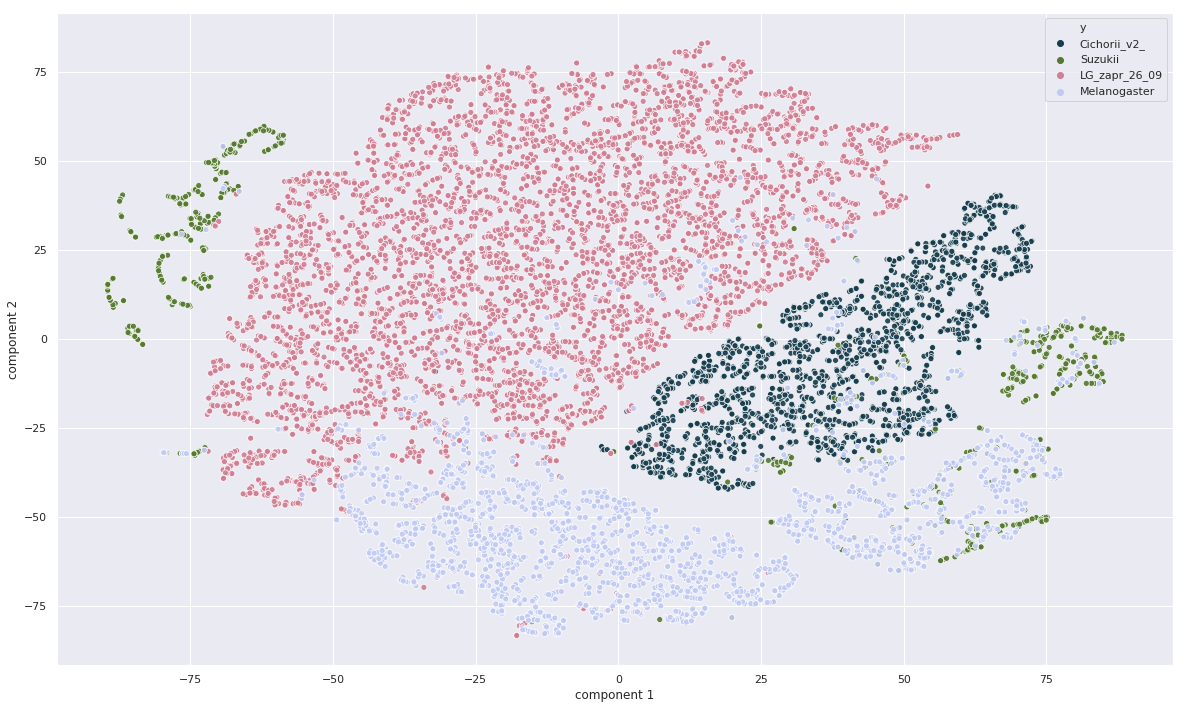

In [201]:
plt.figure(figsize=(20,12))
sns.scatterplot(X_final[:,0], X_final[:,1],alpha=0.9, legend='full', hue=big.y, palette=sns.color_palette("cubehelix", 4)) 
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.show()

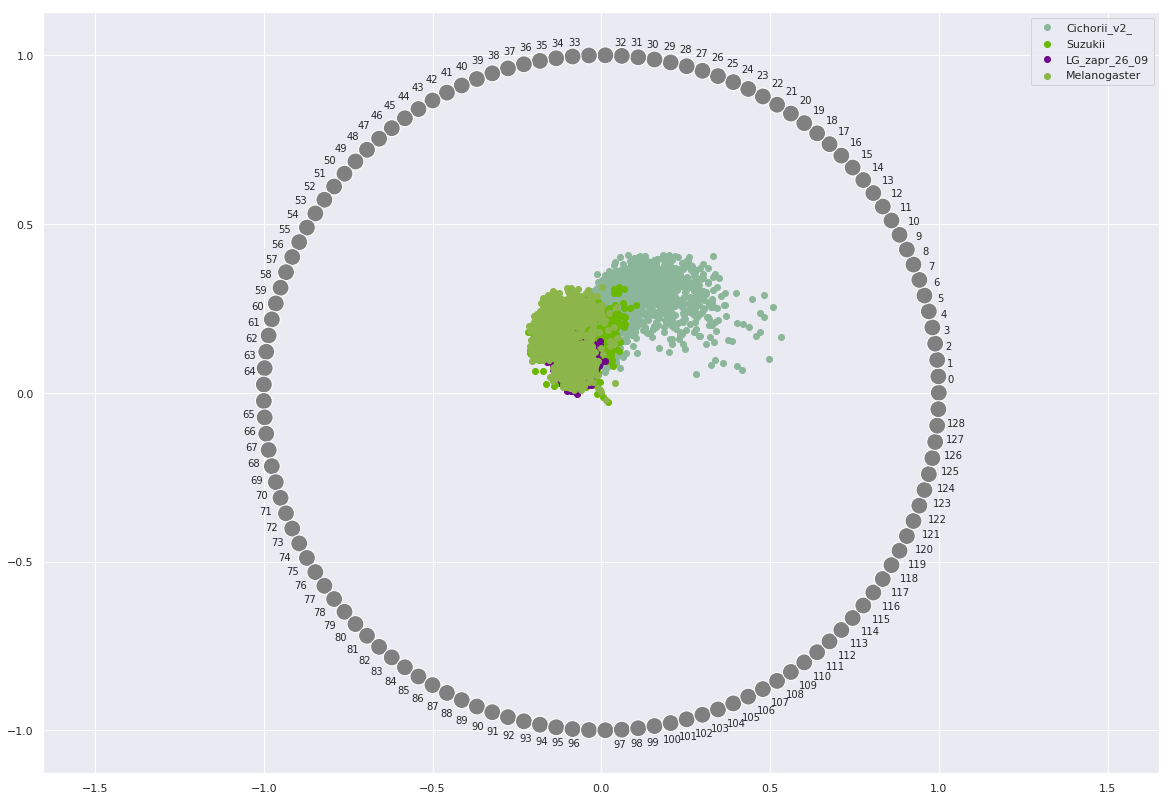

In [205]:
from pandas.plotting import radviz
plt.figure(figsize=(20,14))
radviz(big, 'y')